In [1]:
import geojson
from shapely.geometry import shape
from PIL import Image
from dlup.background import get_mask, entropy_masker, improved_fesi, fesi
from dlup import SlideImage
import matplotlib.pyplot as plt
from rasterio.features import rasterize
import numpy as np
from sklearn.metrics import jaccard_score, f1_score
from glob import glob
from pathlib import Path
from tqdm import tqdm
import scipy.stats as st

In [2]:
def compute_mean_and_conf_interval(accuracies, confidence=.95):
    accuracies = np.array(accuracies)
    n = len(accuracies)
    m, se = np.mean(accuracies), st.sem(accuracies)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [3]:
def evaluate_masking(mask_func, inputs, show_plots=False):
    geojson_files = glob(str(inputs))
    scores = {"f1": np.zeros(len(geojson_files)), "jaccard": np.zeros(len(geojson_files))}

    for i, geojson_path in tqdm(enumerate(geojson_files), total=len(geojson_files)):
        img_name = Path(geojson_path).stem
        img_path = f"/scistor/guest/sjg203/projects/pmc-hhg/images-tif/{img_name}.tif"
        img = Image.open(img_path)

        with open(geojson_path) as f:
            gj = geojson.load(f)
        ground_truth_shape = shape(gj["features"][0]["geometry"])
        ground_truth_mask = rasterize([ground_truth_shape], out_shape=(img.size[1], img.size[0])) # Transpose the output shape


        slide_image = SlideImage.from_file_path(img_path)
        mask = get_mask(slide_image, mask_func) # TODO: get full resolution mask
        mask_resized = np.array(Image.fromarray(mask).resize(img.size))

        if show_plots:
            fig, axs = plt.subplots(1, 3)
            axs[0].imshow(img, cmap='gray')
            axs[0].set_title("original")
            axs[0].set_axis_off()
            axs[1].imshow(ground_truth_mask, cmap='gray', vmin=0, vmax=1)
            axs[1].set_title("ground truth")
            axs[1].set_axis_off()
            axs[2].imshow(mask_resized, cmap='gray', vmin=0, vmax=1)
            axs[2].set_title("calculated")
            axs[2].set_axis_off()
            plt.show()

        ground_truth_mask_flat = ground_truth_mask.flatten()
        mask_resized_flat = mask_resized.flatten()
        js = jaccard_score(ground_truth_mask_flat, mask_resized_flat)
        f1 = f1_score(ground_truth_mask_flat, mask_resized_flat)

        scores["jaccard"][i] = js
        scores["f1"][i] = f1
    
    return scores

  0%|          | 0/8 [00:00<?, ?it/s]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (138240000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


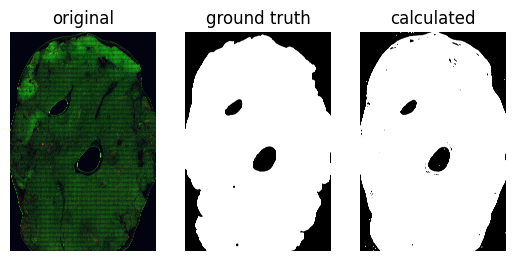

 12%|█▎        | 1/8 [02:32<17:44, 152.14s/it]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


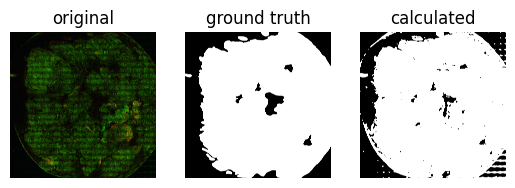

 25%|██▌       | 2/8 [03:32<09:49, 98.28s/it] /scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (94860000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


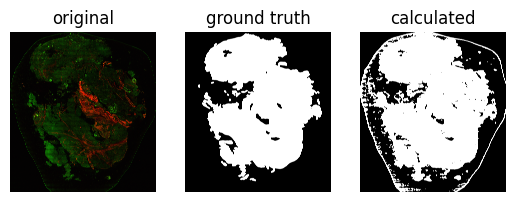

 38%|███▊      | 3/8 [05:12<08:13, 98.78s/it]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


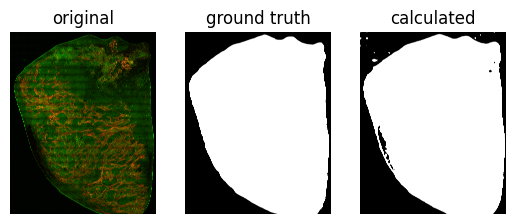

 50%|█████     | 4/8 [05:58<05:12, 78.18s/it]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


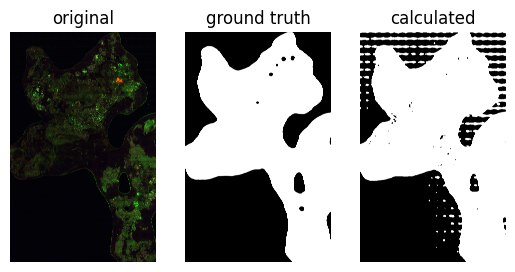

 62%|██████▎   | 5/8 [06:51<03:27, 69.17s/it]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


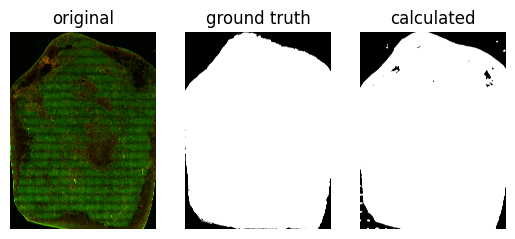

 75%|███████▌  | 6/8 [07:28<01:56, 58.16s/it]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


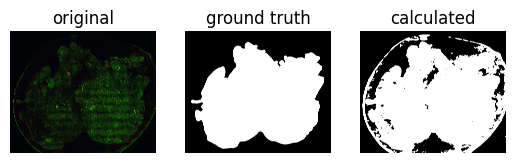

 88%|████████▊ | 7/8 [07:53<00:47, 47.34s/it]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/dlup/background.py:334: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask = mask_func(np.asarray(slide.get_thumbnail(size=(size, size))))


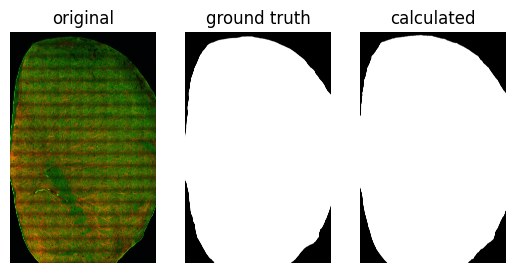

100%|██████████| 8/8 [08:15<00:00, 61.93s/it]

scores (median, error with 95% confidence)
jaccard score = 0.92 ± 0.06
f1 score = 0.96 ± 0.03


In [4]:
inputs = Path("/scistor/guest/sjg203/projects/pmc-hhg/dpat/notebooks/inputs/5/*.geojson")
scores = evaluate_masking(entropy_masker, inputs, show_plots=True)
print(r"scores (median, error with 95% confidence)")
print("jaccard score = {:.2f} ± {:.2f}".format(*compute_mean_and_conf_interval(scores["jaccard"])))
print("f1 score = {:.2f} ± {:.2f}".format(*compute_mean_and_conf_interval(scores["f1"])))

  0%|          | 0/8 [00:00<?, ?it/s]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (138240000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


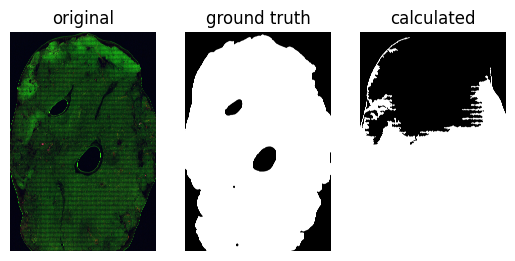

 12%|█▎        | 1/8 [02:31<17:40, 151.47s/it]

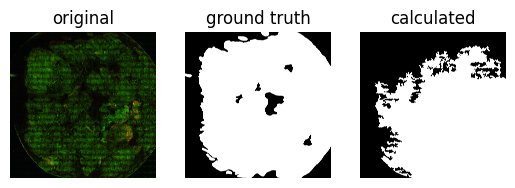

 25%|██▌       | 2/8 [03:30<09:44, 97.34s/it] /scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (94860000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


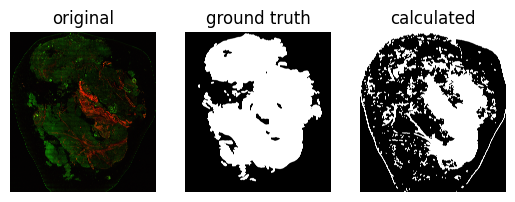

 38%|███▊      | 3/8 [05:10<08:12, 98.56s/it]

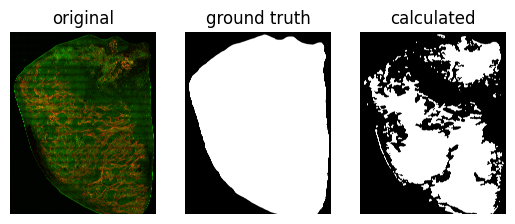

 50%|█████     | 4/8 [05:57<05:12, 78.18s/it]

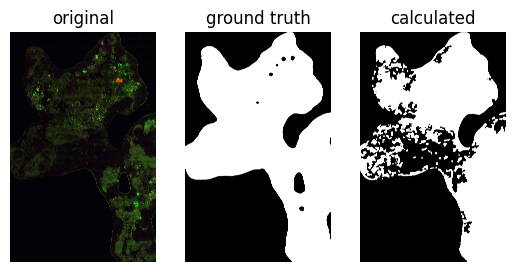

 62%|██████▎   | 5/8 [06:50<03:27, 69.08s/it]

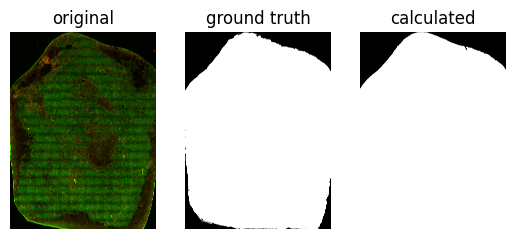

 75%|███████▌  | 6/8 [07:27<01:56, 58.03s/it]

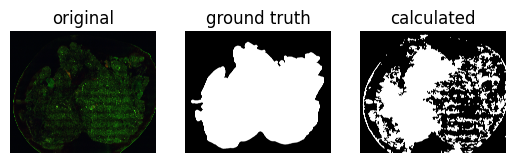

 88%|████████▊ | 7/8 [07:53<00:47, 47.50s/it]

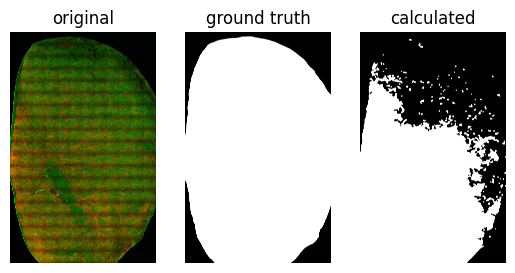

100%|██████████| 8/8 [08:15<00:00, 61.95s/it]

scores (median, error with 95% confidence)
jaccard score = 0.64 ± 0.14
f1 score = 0.77 ± 0.10


In [5]:
inputs = Path("/scistor/guest/sjg203/projects/pmc-hhg/dpat/notebooks/inputs/5/*.geojson")
scores = evaluate_masking(improved_fesi, inputs, show_plots=True)
print(r"scores (median, error with 95% confidence)")
print("jaccard score = {:.2f} ± {:.2f}".format(*compute_mean_and_conf_interval(scores["jaccard"])))
print("f1 score = {:.2f} ± {:.2f}".format(*compute_mean_and_conf_interval(scores["f1"])))

  0%|          | 0/8 [00:00<?, ?it/s]/scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (138240000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


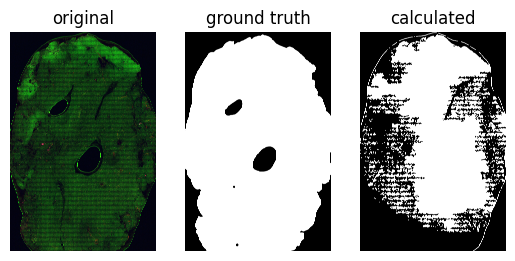

 12%|█▎        | 1/8 [02:34<18:02, 154.62s/it]

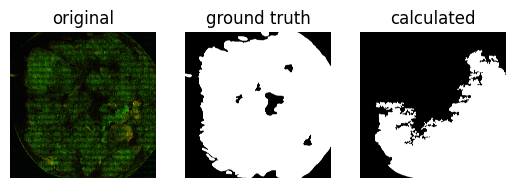

 25%|██▌       | 2/8 [03:32<09:47, 97.98s/it] /scistor/guest/sjg203/.conda/envs/pmchhg/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (94860000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


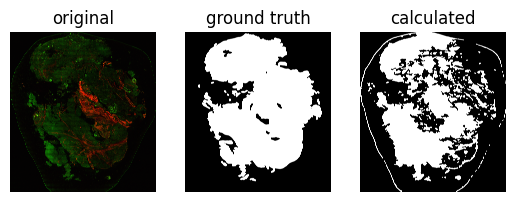

 38%|███▊      | 3/8 [05:12<08:12, 98.47s/it]

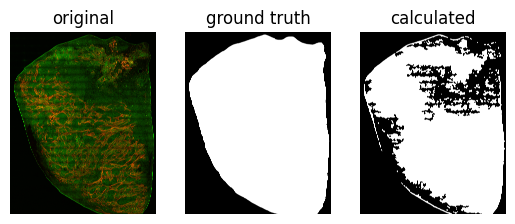

 50%|█████     | 4/8 [05:58<05:11, 77.95s/it]

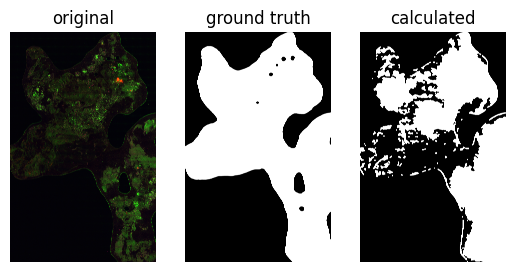

 62%|██████▎   | 5/8 [06:50<03:26, 68.71s/it]

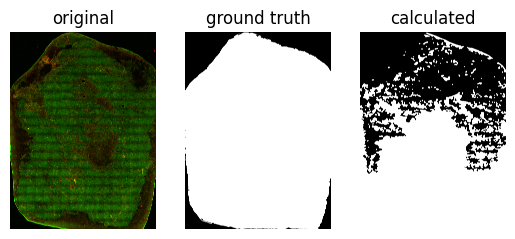

 75%|███████▌  | 6/8 [07:27<01:55, 57.79s/it]

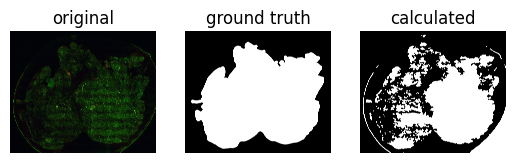

 88%|████████▊ | 7/8 [07:52<00:47, 47.17s/it]

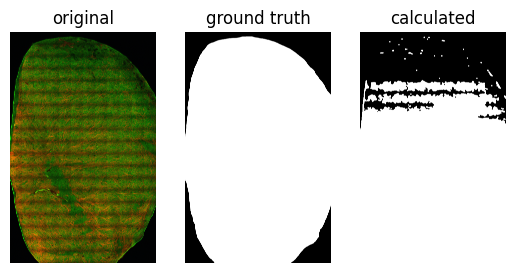

100%|██████████| 8/8 [08:14<00:00, 61.85s/it]

scores (median, error with 95% confidence)
jaccard score = 0.64 ± 0.07
f1 score = 0.78 ± 0.05


In [6]:
inputs = Path("/scistor/guest/sjg203/projects/pmc-hhg/dpat/notebooks/inputs/5/*.geojson")
scores = evaluate_masking(fesi, inputs, show_plots=True)
print(r"scores (median, error with 95% confidence)")
print("jaccard score = {:.2f} ± {:.2f}".format(*compute_mean_and_conf_interval(scores["jaccard"])))
print("f1 score = {:.2f} ± {:.2f}".format(*compute_mean_and_conf_interval(scores["f1"])))

Scores are with 95% confidence interval. Underline is statistically significantly different.
| Algorithm         | Jaccard index | F1 |
|--------------|:-----:|-----------:|
| FESI | $0.64 \pm 0.07$ |   $0.78 \pm 0.05$      |
| Improved FESI |  $0.64 \pm 0.14$ |          $0.77 \pm 0.10$ |
| EntropyMasker | $\underline{0.92 \pm 0.06}$ | $\underline{0.96 \pm 0.03}$ |